# HSE 2021: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1 points)
* [Task 2](#task2) (1 points)
* [Task 3](#task3) (1 points)
* [Task 4](#task4) (1 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Download the file `data_Mar_64.txt`.

In [1]:
#!wget https://raw.githubusercontent.com/AKuzina/ml_se/main/hw/hw_5/data_Mar_64.txt

In [2]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/ml/datasets/One-hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK. 

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [3]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [4]:
import numpy as np
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics (e.g. Logistic regression).
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [5]:
## your code here
from sklearn import preprocessing

y = preprocessing.LabelEncoder().fit_transform(y_name)
y

array([ 0,  0,  0, ..., 99, 99, 99])

Split your data into **train** and **test**.

In [6]:
## your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
print('X_train shape is ', X_train.shape)
print('X_test shape is ', X_test.shape)
print('y_train shape is ', y_train.shape)
print('y_test shape is ', y_test.shape)

X_train shape is  (1200, 64)
X_test shape is  (400, 64)
y_train shape is  (1200,)
y_test shape is  (400,)


Train a simple classifier on your data to predict target. Calculate accuracy, F-score.

In [8]:
## your code here
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f"Accuracy for train is {metrics.accuracy_score(y_train, y_pred_train)}")
print(f"F1_score for train is {metrics.f1_score(y_train, y_pred_train, average='weighted')}")
print(f"Accuracy for test is {metrics.accuracy_score(y_test, y_pred_test)}")
print(f"F1_score for test is {metrics.f1_score(y_test, y_pred_test, average='weighted')}")

Accuracy for train is 0.13166666666666665
F1_score for train is 0.06897904073739848
Accuracy for test is 0.0625
F1_score for test is 0.03949845573769533


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=0`

In [9]:
## your code here
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2, random_state=0).fit_transform(X)
X_pca.shape

(1600, 2)

Select objects that match values from 0 to 14 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<15]` to the `scatter` method.

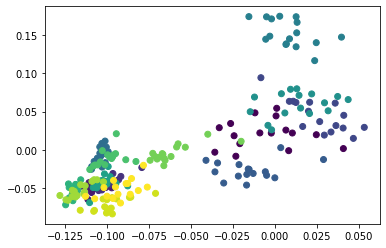

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

## your code here
plt.scatter(X_pca[y<15][:, 0], X_pca[y<15][:, 1], c=y[y<15])

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

/home/nickyoleary/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nickyoleary/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


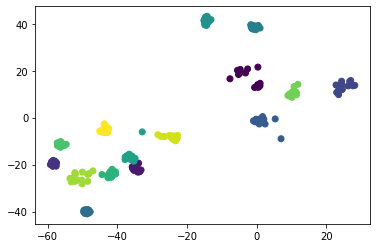

In [11]:
## your code here
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X)
plt.scatter(X_tsne[y<15][:, 0], X_tsne[y<15][:, 1], c=y[y<15])

**Task 2. <a id="task2"></a> (1 points)** Specify the coordinates of the object with index 0 (`X[0]`) after applying the TSNE method. Round the numbers to hundredths.

In [12]:
## your code here

cords_1_tsne = np.round(X_tsne[0], 2)
cords_1_tsne

array([-7.68, 16.54], dtype=float32)

**Task 3. <a id="task3"></a> (1 points)** Specify the coordinates of the object with index 0 (`X[0]`) after applying the PCA method. Round the numbers to hundredths.

In [13]:
## your code here

cords_1_pca = np.round(X_pca[0], 2)
cords_1_pca

array([-0.03,  0.03])

**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

# Object visualization is possible via both methods, but visual separation is achieved only via TSNE method.
# Answer (2)

## K_means

**Task 5. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [14]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax): 
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        ## your code here
        return np.array([X[self.labels == i].mean(axis=0) for i in np.unique(self.labels)]) 
    
    def update_lables(self, X):
        ## your code here
        return pairwise_distances_argmin(X, self.centers) 

    def fit(self, X):
        self.centers = X[np.random.choice(X.shape[0], self.n_clusters, False)]
        
        self.labels = self.update_lables(X)

        for it in range(self.n_iters):
            new_labels = self.update_lables(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0
      
            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);

        return 1
    
    def predict(self, X):
        labels = self.update_lables(X)
        return labels

Generating data for clustering

In [15]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [16]:
X, y = noisy_blobs

**Task 6. <a id="task6"></a> (1.5 points)** 

6.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=100`. Specify the response for the object with index 1.

Converge by tolerance centers
Center of  1 cluster is [1.00650451 4.47804083]


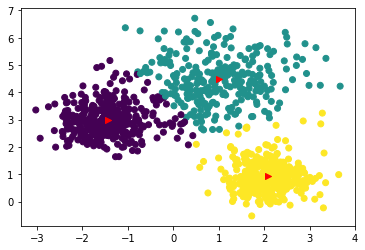

In [17]:
## your code here
model1 = MyKMeans()
model1.fit(X)
print(f"Center of  {model1.labels[1]} cluster is {model1.centers[1]}")

6.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 5`. Specify the response for the object with index 1.

Converge by tolerance centers
Center of  1 cluster is [1.00650451 4.47804083]


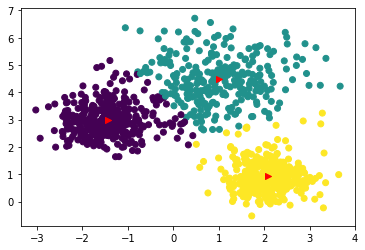

In [18]:
# your code here
model2 = MyKMeans(n_iters=5)
model2.fit(X)
print(f"Center of  {model2.labels[1]} cluster is {model2.centers[1]}")

6.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 5 to 100

In [19]:
## your code here

num_of_changed = np.sum(model1.labels != model2.labels)
num_of_changed

0

# Thus, between 5 and 100 iterations there are no changes of lables and centers.

**Task 7. <a id="task6"></a> (1.5 points)** 

Using the elbow method, select the optimal number of clusters. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them. To do this, iterate the parameter k from 2 to 50 in steps of 2. 

Converge by tolerance centers


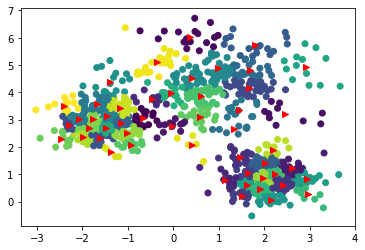

In [20]:
## your code here
metric_values = []
for n_clusters in range(2, 51, 2):
    model = MyKMeans(n_clusters=n_clusters)
    model.fit(X)
    metric_values.append(
        sum([np.sum(metrics.pairwise_distances(X[model.labels == i], [model.centers[i]]) ** 2) 
             for i in np.unique(model.labels)]))

No handles with labels found to put in legend.


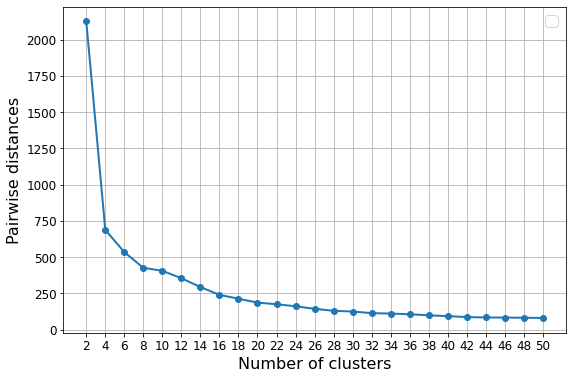

In [21]:
plt.figure(figsize=(9, 6))
plt.plot(range(2, 51, 2), metric_values, 'o-', linewidth=2)
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Pairwise distances', size=16)
plt.xticks(range(2, 51, 2), size=12)
plt.yticks(size=12)
plt.legend(loc='best', fontsize=16)
plt.grid(b=1)
plt.show()

# As for me, the optimal number of clusters is 16. The plot starts being rather flat with 8 clusters, but then steadily goes steeper till 16, where the further changes may be considered insignificant.

## DBSCAN

**Task 8. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.5` hyperparameter. Specify the response for the object with index 1.

In [22]:
def plot_clusters(X, y):
    if y is not None:
        for cluster_label in np.unique(y):
            plt.scatter(X[y == cluster_label, 0],
                        X[y == cluster_label, 1],
                        label=str(cluster_label))
    else:
        plt.scatter(X[:, 0], X[:, 1], label='samples')

    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.legend(loc='best', fontsize=12) 
    plt.show()

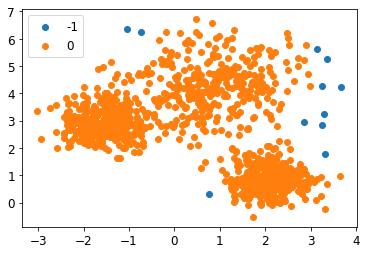

Response for the object with index 1 is cluster 0


In [23]:
## your code here
from sklearn import cluster

# Run clusterer
clusterer = cluster.DBSCAN(eps=0.5)
y_pred = clusterer.fit_predict(X)

# Plot clustering results
plot_clusters(X, y_pred)

# Response for the object with index 1
print(f"Response for the object with index 1 is cluster {y_pred[1]}")

**Task 9. <a id="task8"></a> (1 point)** 9.1 Specify the resulting number of clusters

In [24]:
## your code here

num_of_clusters = np.sum(np.unique(clusterer.labels_) != -1)
num_of_clusters

1

9.2 How many objects were counted as outliers (marked -1)?

In [25]:
## your code here

num_of_outliers = np.sum(clusterer.labels_ == -1)
num_of_outliers

11

# Thus, with eps=0.5 there appears to be only 1 cluster. Let us decrease eps and have a look at another distribution.

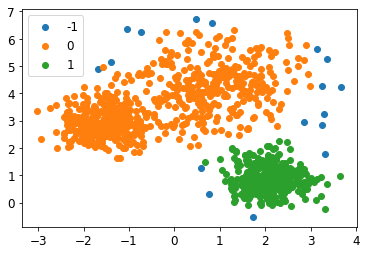

eps= 0.45


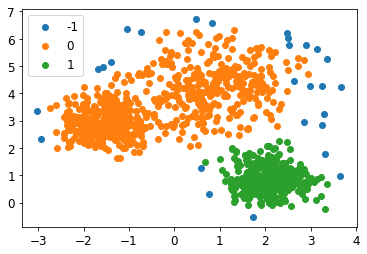

eps= 0.4


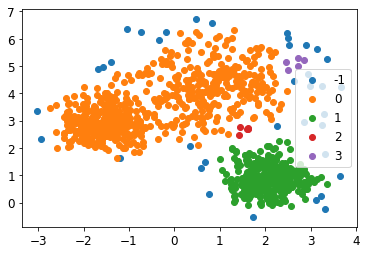

eps= 0.35


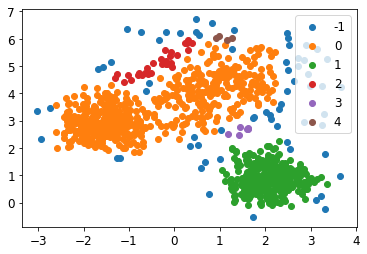

eps= 0.3


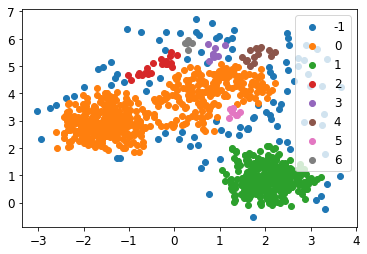

eps= 0.25


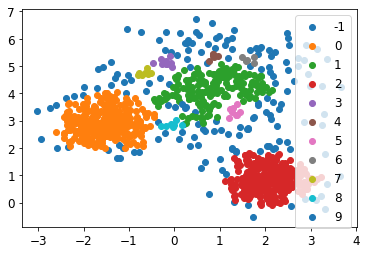

eps= 0.2


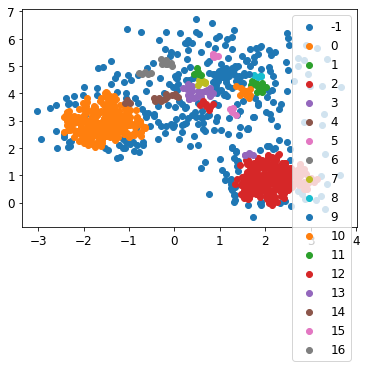

eps= 0.14999999999999997


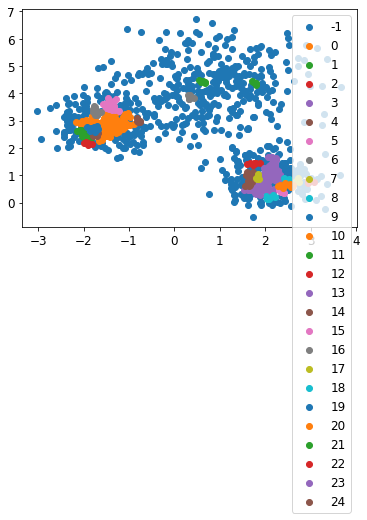

eps= 0.09999999999999998


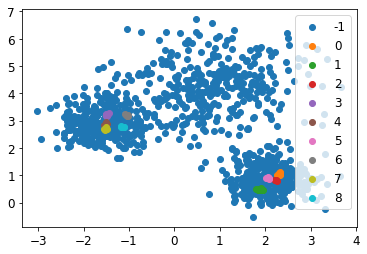

eps= 0.05


In [26]:
for eps in np.linspace(0.45, 0.05, 9):
    # Run clusterer
    clusterer = cluster.DBSCAN(eps=eps)
    y_pred = clusterer.fit_predict(X)

    # Plot clustering results
    plot_clusters(X, y_pred)
    print('eps=', eps)

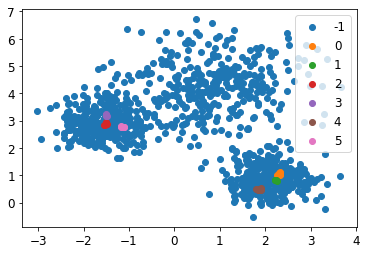

eps= 0.045


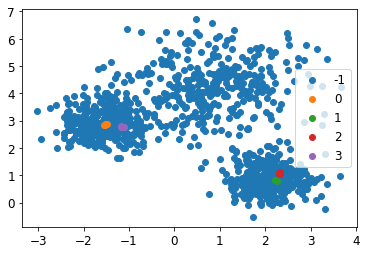

eps= 0.04


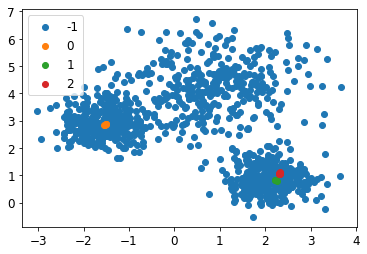

eps= 0.034999999999999996


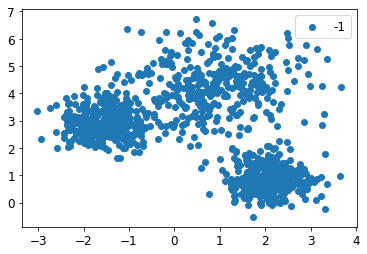

eps= 0.03


In [27]:
for eps in np.linspace(0.045, 0.03, 4):
    # Run clusterer
    clusterer = cluster.DBSCAN(eps=eps)
    y_pred = clusterer.fit_predict(X)

    # Plot clustering results
    plot_clusters(X, y_pred)
    print('eps=', eps)

# To summarize, in the beginning with the fall of eps grows the number of clusters, as some points within one cluster stop being close enough to remain the cluster united. However, number of clusters starts to decrease after all, the points begin to be to far from all the others. As a result, all of the points become outliers.